![miad4.png](Archivos/miad4.png)

# Laboratorio 1

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta actividad debes utilizar únicamente recursos nativos de Python (puedes usar librerías como `math` y `random`). Está prohibido el uso de librerías externas, a excepción de `matplotlib`. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

En algunas de las misiones encontrarás: una **versión base**, la cual indica el requerimiento mínimo de la misión; una **versión completa**, la cual indica mejoras deseables o complementos a la **versión base**. Un desarrollo aceptable del laboratorio debe satisfacer la **versión base** y un desarrollo correcto del laboratorio debe satisfacer la **versión completa**. Cumplir con el desarrollo de la **versión completa** desde un inicio hará más sencillas las misiones siguientes.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos en estructuras de Python.
3. Crear y llamar funciones.
4. Implementar condicionales diferenciando `if`, `elif` y `else`.
5. Implementar ciclos diferenciando el propósito de `for` y `while`.

## Contexto: exploración del potencial para asignar becas Unialpes

La Universidad de los Alpes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo y, por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

### Misión 1

**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

In [69]:
import math
import matplotlib.pyplot as plt

#funcion para leer archivos
def lectura_archivos(archivo): 
    with open('./Archivos/' + archivo, "r") as f:
        lectura = [valor.strip() for valor in f.readlines()]
        if lectura[0].replace(".", "").isdigit(): # Identifico si son numeros para convertir el formato a int o float
            if "." in lectura[0]:
                for i in range(len(lectura)):
                    lectura[i]=float(lectura[i])
            else:
                for i in range(len(lectura)):
                    lectura[i]=int(lectura[i])
        return  lectura



#Funcion para crear un diccionario que contenga todos los archivos requeridos
def creacion_diccionario_original(archivos):
    dicc_variables= {}
    for i in archivos:
        dicc_variables[i.replace(".txt","")] = lectura_archivos(i) #Leo archivo y lo agrego al diccionario
    lista=[]
    for i in range(0, len(dicc_variables["edad"])):
        lista.append(i)
    dicc_variables["indice"]= lista #adiciono "columna" con indices para identificar a cada uno de los encuestados
    return dicc_variables 

archivos = ["edad.txt", "escolaridad.txt", "estado_civil.txt", "estrato.txt", "genero.txt", "promedio.txt", "region.txt"]
dicc_variables = creacion_diccionario_original(archivos)


### Misión 2

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

La media de la variable  edad es : 48.748
La mediana de la variable  edad es : 49.0
La varianza de la variable  edad es : 345.768496
La desviación estandar de la variable  edad es : 18.59485133040864
El valor maximo de la variable  edad es : 80
El valor minimo de la variable  edad es : 18

La media de la variable  estrato es : 2.308
La mediana de la variable  estrato es : 2.0
La varianza de la variable  estrato es : 0.9531359999999944
La desviación estandar de la variable  estrato es : 0.9762868430947917
El valor maximo de la variable  estrato es : 5
El valor minimo de la variable  estrato es : 1

La media de la variable  promedio es : 2.6212000000000004
La mediana de la variable  promedio es : 2.7
La varianza de la variable  promedio es : 1.2452705600000036
La desviación estandar de la variable  promedio es : 1.1159169144698917
El valor maximo de la variable  promedio es : 5.0
El valor minimo de la variable  promedio es : 0.0

GRAFICOS DE VARIABLE: edad


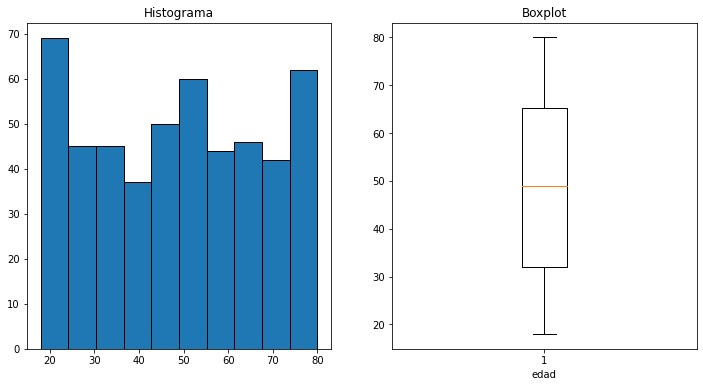

GRAFICOS DE VARIABLE: escolaridad


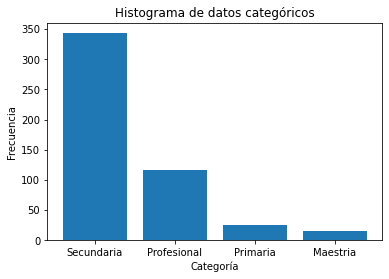

GRAFICOS DE VARIABLE: estado_civil


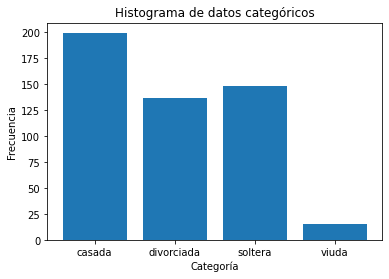

GRAFICOS DE VARIABLE: estrato


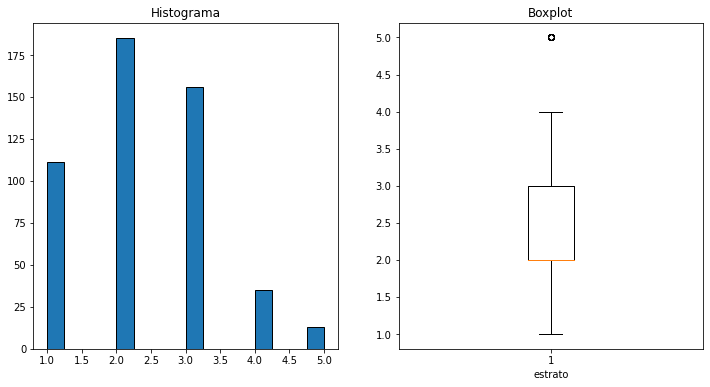

GRAFICOS DE VARIABLE: genero


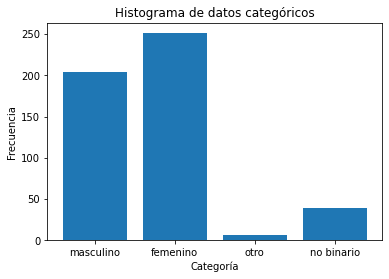

GRAFICOS DE VARIABLE: promedio


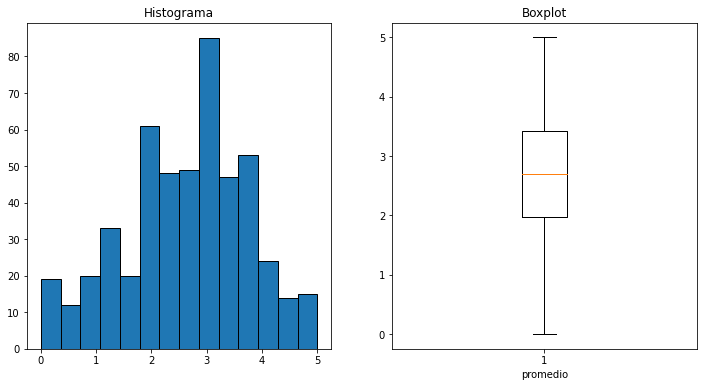

GRAFICOS DE VARIABLE: region


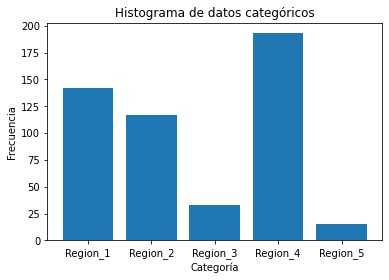

In [70]:
def media_f(suma, datos):
    return suma/datos
def mediana_f(datos):
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)
    mediana = (datos_ordenados[n // 2 - 1] + datos_ordenados[n // 2]) / 2 if n % 2 == 0 else datos_ordenados[n // 2]
    return mediana
def varianza_f(datos):
    media = media_f(sum(datos), len(datos))
    suma_cuadrados_diferencias = sum((x - media) ** 2 for x in datos)
    varianza = suma_cuadrados_diferencias / len(datos)
    return varianza

def graficas_f(datos,key):
    if type(dicc_variables[key][0]) == int or type(dicc_variables[key][0]) == float:
        print("\033[1m\033[91mGRAFICOS DE VARIABLE:\033[0m" , key)
        fig, ax = plt.subplots(1,2,figsize=(12, 6))
        grafico1 = ax[0].hist(datos, bins='auto', edgecolor='black')
        plt.xlabel(key)
        ax[0].set_title('Histograma')
        grafico2 = ax[1].boxplot(datos)
        ax[1].set_title('Boxplot')
        plt.show()
    else:
        print("\033[1m\033[91mGRAFICOS DE VARIABLE:\033[0m" , key)
        frecuencias = {}
        for categoria in datos:
            frecuencias[categoria] = frecuencias.get(categoria, 0) + 1
        plt.bar(frecuencias.keys(), frecuencias.values())
        plt.xlabel('Categoría')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de datos categóricos')
        plt.show()

    
def analisis_estadistico_f(dicc_variables):

    for key in dicc_variables.keys():
        if key != "indice":
            if type(dicc_variables[key][0]) == int or type(dicc_variables[key][0]) == float:
                media = media_f(sum(dicc_variables[key]), len(dicc_variables[key]))
                mediana = mediana_f(dicc_variables[key])
                varianza = varianza_f(dicc_variables[key])
                maximo = max(dicc_variables[key])
                minimo = min(dicc_variables[key])
                desviacion_std = math.sqrt(varianza)
                print("La media de la variable " , key , "es :", str(media))
                print("La mediana de la variable " , key , "es :", str(mediana))
                print("La varianza de la variable " , key , "es :", str(varianza))
                print("La desviación estandar de la variable " , key , "es :", str(desviacion_std))
                print("El valor maximo de la variable " , key , "es :", str(maximo))
                print("El valor minimo de la variable " , key , "es :", str(minimo))
                print("")

    for key in dicc_variables.keys():
        if key != "indice":
            graficas_f(dicc_variables[key], key)


analisis_estadistico_f(dicc_variables)




#### Podemos evidenciar en las estadisticas de las variables los siguientes puntos:

El promedio de edad de los encuestados es de 48.7 años, con una desviacion estandar de 18.5. 
La mayoria de los encuestados son de los estratos 1, 2 y 3. Con una baja representacion de los estratos 4 y 5.
La mayoria de los encuestados tienen un promedio entre 2 y 4. Sin embargo hay encuestados cuyo promedio es 0.

El nivel de escolaridad de los encuestados es de secundaria para la mayoria (343 encuestados). Una pequeña porcion de los encuestados tenen maestria(15 encuestados).
Casi un 50% de los encuestados son casados. El resto de encuestados son divorciados o solteros. Hay una pequeña cantidad de encuestados viudos(16 encuestados).
La mayoria de encuestados son de genero masculino y femenino, con una proporcial similar en relacion al total de encuestados. Se identifican 6 encuestados catalogados como "otro" y 39 como no binario.
La region 4 tiene una mayor proporcion de encuestados, 193 encuestados. Las regiones 1 y 2 tienen 119 encuestados y la region 2 tiene 103 encuestados. La region 3 y 4 tienen una representacion menor en relacion a los encuestados.




## Fase 2: abordar la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que considerar las características sociodemográficas (ej., género, región, etc.) es parte del espíritu del programa, mientras que otros piensan que el criterio de selección debería centrarse estrictamente en lo económico y académico. Dado esto, el comité ha sugerido evaluar dos propuestas, suponiendo un número $N$ de becas disponibles.

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

* La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

### Misión 3

Define la pregunta de negocio y la pregunta de *analytics* para esta situación.

Pregunta de negocio: Queremos diseñar politicas o reglas de asignacion de becas para posibles candidatos al programa de becas de la Universidad de los Alpes. Por lo tanto queremos identificar cual es la mejor politica para seleccionar posibles candidatos al programa de becas de la Universidad de los Alpes.


Pregunta de analytics: Que algoritmo y proceso permite de manera mas eficiente asignar las becas del programa de becas de la Universidad de los Alpes. Logrando automatizar el proceso logico del algoritmo definiendo posibles reglas de seleccion y su respectiva evaluacion contra una muestra para determinar el comportamiento de las politicas.

### Misión 4

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la primera propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [85]:
# funcion para crear una lista de elementos unicos de los vaores de un Key en un diccionario que entrego a la funcion
def valores_unicos(datos, llave): 
    lista = []
    for valores in datos[llave]:
        if not valores in lista:
            lista.append(valores)
    return  lista

# Funcion para crear las posibles combinaciones de region y genero (500 nuevas filas con valores redundantes). Retorna la lista de combinaciones region y genero, los porcentajes a los que corresponde estas combinaciones del total, y una copia del diccionario original con todas las variables.
def segmentacion_var_f(becas, dicc_variables):
    
    dicc_variables2 = {k: v[:] for k, v in dicc_variables.items()}
    dicc_variables2["validacion"] = ""
    l1 = "region"
    l2 = "genero"
    list_l1_l2 = []

    for i in range(0, len(dicc_variables["edad"])):
        list_l1_l2.append(dicc_variables2[l1][i] + " - " + dicc_variables2[l2][i])

    dicc_variables2["validacion"] = list_l1_l2 #Creo una nueva columna en la copia de mi diccionario, donde tengo referenciada la combinacion que se da para la fila de los valores de region y genero 
    lista_grupos_segm = valores_unicos(dicc_variables2, "validacion")

    porcentaje_becas_Xcriterio = []
    total_est_Xcriterio = []
    numero_est_conbecas_Xcriterio = []
    for valor in lista_grupos_segm:
        porcentaje_becas_Xcriterio.append((dicc_variables2["validacion"].count(valor)/500)*100)
        total_est_Xcriterio.append(dicc_variables2["validacion"].count(valor))
        numero_est_conbecas_Xcriterio.append(becas*((dicc_variables2["validacion"].count(valor)/500)))
    return lista_grupos_segm, numero_est_conbecas_Xcriterio, dicc_variables2

#Crear diccionarios por separado para identificar los grupos por combinacion. Retorna diccionario con los encuestados que pertenecen al grupo region-genero
def filtro_grupo_f(valor, dicc_variables2):
    dicc_grupos = {}
    lista_promedio = []
    lista_indice = []
    for val_dic in tuple(dicc_variables2["validacion"]): #Tupla para evitar que el for iterativo se afecte al eliminar valores del diccionario 2
            
        if valor == val_dic:
                
            indice = dicc_variables2["validacion"].index(val_dic)

            lista_promedio.append(dicc_variables2["promedio"][indice])
            dicc_grupos["promedio"] = lista_promedio
            del dicc_variables2["promedio"][indice]

            lista_indice.append(dicc_variables2["indice"][indice])
            dicc_grupos["indice"] = lista_indice
            del dicc_variables2["indice"][indice]

                

            del dicc_variables2["validacion"][indice]
    return dicc_grupos


def becados_f(dicc_grupos): # seleccion menor promedio
        
        indice = dicc_grupos["promedio"].index(max(dicc_grupos["promedio"])) # encuentro el estudiante con mayor promedio y retorna el indice
        beca_asignada = dicc_grupos["indice"][indice]
        del dicc_grupos["indice"][indice]
        del dicc_grupos["promedio"][indice]

        return beca_asignada
             

#Funcion para redondear al entero superior o inferior
def aprox_num_f(valor):
    if (valor > 0) or (valor%1<=0.7):     
        valor=math.ceil(valor)
    else:
        valor=math.floor(valor) #Busco dar mayor representacion a los que porcentualmente no representan  muchas opciones de beca para la combinacion de criterios
    return valor


############ FUNCION PRINCIPAL para asignar becas
def asignacion_becas_prpuesta_1(dicc_variables, becas_in):
    lista_becados_total = []
    becas_restantes = becas_in
    contador_becas = 0
    
    segm = segmentacion_var_f(becas_in, dicc_variables)  # Funcion para crear las etiquetas de combinacion de region y genero, y porcentajes en relacion al total de valores
    dicc_variables2 = segm[2]
    lista_grupos_segm = segm[0]
    numero_est_conbecas_Xcriterio = segm[1]
    for i in range(0, len(lista_grupos_segm)): 
        lista_becados = []
        dicc_grupos = filtro_grupo_f(lista_grupos_segm[i], dicc_variables2) # Funcion para separar solo los valores que pertenecen a un grupo de genero-region a la vez
        becas_asignar = aprox_num_f(numero_est_conbecas_Xcriterio[i]) #Funcion para identificar cuentas becas asignadas de acuerdo a la combinacion genero-region
        becas_restantes -= becas_asignar
        if becas_restantes > -1:
            
            contador_becas +=becas_asignar
            for becas in range(0,becas_asignar):
                lista_becados.append(becados_f(dicc_grupos))
            print("")    
            print("Los indices de las personas del grupo " + dicc_variables["region"][lista_becados[0]-1] + " - " + dicc_variables["genero"][lista_becados[0]-1] + " que recibieron beca son:" )
            print(lista_becados)
            lista_becados_total.append(lista_becados)
        else:
            becas_restantes = becas_asignar + becas_restantes
            if becas_restantes != 0: # Ultimo ciclo para asignar las becas que se puedan en relacion a las que hay disponibles.
                contador_becas += becas_restantes
                for becas in range(0,becas_restantes):
                    lista_becados.append(becados_f(dicc_grupos))
                print("")
                print("Los indices de las personas del grupo " + dicc_variables["region"][lista_becados[0]-1] + " - " + dicc_variables["genero"][lista_becados[0]-1] + " que recibieron beca son: " )
                print(lista_becados)  
                lista_becados_total.append(lista_becados)
            print("")    
            print("se asignaron " + str(contador_becas) + " becas de un total de " + str(becas_in) +" : " )
            break
    lista_becados_total = [elemento for sublista in lista_becados_total for elemento in sublista] 
    print(lista_becados_total)
    return(lista_becados_total)


m=input("ingrese el numero de becas a asignar: ")
print("")

asignacion_becas_prpuesta_1(dicc_variables, int(m))
print("")


ingrese el numero de becas a asignar: 59


Los indices de las personas del grupo Region_2 - masculino que recibieron beca son:
[162, 394, 9, 452, 222, 398, 428, 281, 33]

Los indices de las personas del grupo Region_4 - masculino que recibieron beca son:
[363, 109, 355, 287, 262, 250, 337, 69]

Los indices de las personas del grupo Region_5 - no binario que recibieron beca son:
[376, 471, 385, 161, 79, 253]

Los indices de las personas del grupo Region_2 - masculino que recibieron beca son:
[4]

Los indices de las personas del grupo Region_2 - femenino que recibieron beca son:
[22, 96]

Los indices de las personas del grupo Region_4 - femenino que recibieron beca son:
[49]

Los indices de las personas del grupo Region_5 - masculino que recibieron beca son:
[7, 207, 137, 409, 134, 45, 74, 356]

Los indices de las personas del grupo Region_4 - femenino que recibieron beca son:
[243, 60, 308, 70, 256, 453, 108, 213, 145, 433, 17, 36, 53]

Los indices de las personas del grupo Region_2 - f


### Misión 5

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la segunda propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [86]:
# Funcion para crear lista de valores unicos
def valores_unicos(datos, llave): 
    lista = []
    for valores in datos[llave]:
        if not valores in lista:
            lista.append(valores)
    return  lista


############ FUNCION PRINCIPAL para asignar becas
def asignar_becas_propuesta_2(datos, num_becas):
    estratos = valores_unicos(dicc_variables, "estrato")
    estratos.sort()
    becas_asignadas = []
    estudiantes_con_beca = set()  # Conjunto para prevenir valores repetidos 

    iteracion = 1
    while num_becas > 0:
        print("")
        print("\033[1mIteracion numero " + str(iteracion) + " de asignacion de becas\033[0m")
        
        iteracion += 1
        #Asignacion de becas por estrato
        for estrato in estratos:
            subpoblacion = [i for i, e in enumerate(datos['estrato']) if e == estrato and i not in estudiantes_con_beca] # crea lista con indices de cada persona que pertenezc al estrato evaluado y que no este en la lista de becas asignadas.
            subpoblacion.sort(key=lambda i: datos['promedio'][i], reverse=True) # organiza inversamente para asignar posteriormente becas a mejores promedios.
            num_becas_estrato = min(len(subpoblacion), max(1, int(len(subpoblacion) * 0.02)))
            lista_iteracion = []

            for i in range(num_becas_estrato):
                becas_asignadas.append(subpoblacion[i])
                lista_iteracion.append(subpoblacion[i])
                estudiantes_con_beca.add(subpoblacion[i])  # Agregar el índice del estudiante con beca
                num_becas -= 1
                if num_becas == 0:
                    print("Para el estrato " + str(estrato) + " se asignaron becas a los candidatos con indice: ")
                    print(lista_iteracion)
                    return becas_asignadas  
            print("Para el estrato " + str(estrato) + " se asignaron becas a los candidatos con indice: ")
            print(lista_iteracion)
            

    return becas_asignadas


m=input("Ingrese el numero de becas a asignar: ")
print("")
becas_asignadas_2 = asignar_becas_propuesta_2(dicc_variables, int(m))
print("")
print("Índices del total de los estudiantes beneficiados con becas:", becas_asignadas_2)

Ingrese el numero de becas a asignar: 59


Iteracion numero 1 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos con indice: 
[376, 162]
Para el estrato 2 se asignaron becas a los candidatos con indice: 
[243, 7, 207]
Para el estrato 3 se asignaron becas a los candidatos con indice: 
[60, 471, 109]
Para el estrato 4 se asignaron becas a los candidatos con indice: 
[394]
Para el estrato 5 se asignaron becas a los candidatos con indice: 
[259]

Iteracion numero 2 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos con indice: 
[363, 283]
Para el estrato 2 se asignaron becas a los candidatos con indice: 
[491, 137, 478]
Para el estrato 3 se asignaron becas a los candidatos con indice: 
[159, 9, 49]
Para el estrato 4 se asignaron becas a los candidatos con indice: 
[53]
Para el estrato 5 se asignaron becas a los candidatos con indice: 
[99]

Iteracion numero 3 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos con

### Misión 6

**Versión base**: con base en tu desarrollo de las misiones 2, 4 y 5, implementa un procedimiento que le permita al comité comparar las dos propuestas, exponiendo métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas que se obtendrían con cada propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** de manera automática para ambas propuestas.

Ingrese el numero de becas a asignar para ambas propuestas: 59

ANALISIS ASIGNACION DE BECAS - PROPUESTA 1

Los indices de las personas del grupo Region_2 - masculino que recibieron beca son:
[162, 394, 9, 452, 222, 398, 428, 281, 33]

Los indices de las personas del grupo Region_4 - masculino que recibieron beca son:
[363, 109, 355, 287, 262, 250, 337, 69]

Los indices de las personas del grupo Region_5 - no binario que recibieron beca son:
[376, 471, 385, 161, 79, 253]

Los indices de las personas del grupo Region_2 - masculino que recibieron beca son:
[4]

Los indices de las personas del grupo Region_2 - femenino que recibieron beca son:
[22, 96]

Los indices de las personas del grupo Region_4 - femenino que recibieron beca son:
[49]

Los indices de las personas del grupo Region_5 - masculino que recibieron beca son:
[7, 207, 137, 409, 134, 45, 74, 356]

Los indices de las personas del grupo Region_4 - femenino que recibieron beca son:
[243, 60, 308, 70, 256, 453, 108, 213, 145, 433

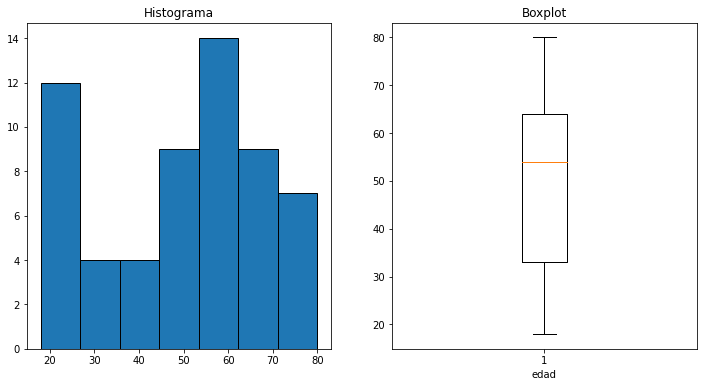

GRAFICOS DE VARIABLE: escolaridad


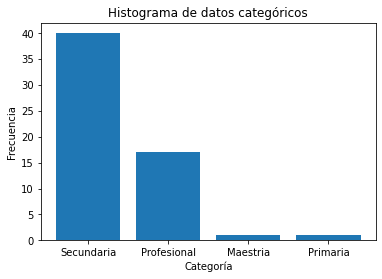

GRAFICOS DE VARIABLE: estado_civil


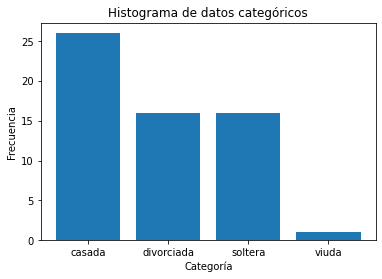

GRAFICOS DE VARIABLE: estrato


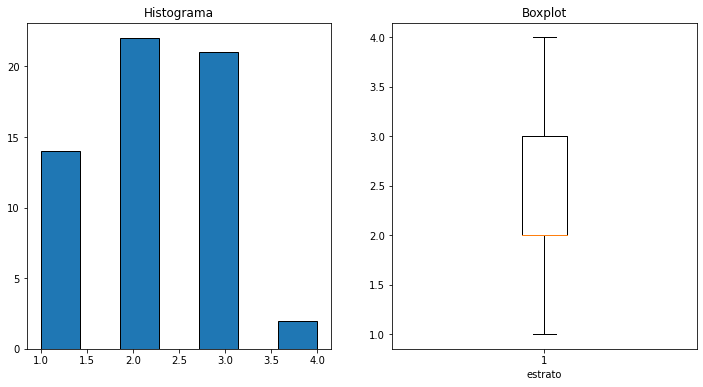

GRAFICOS DE VARIABLE: genero


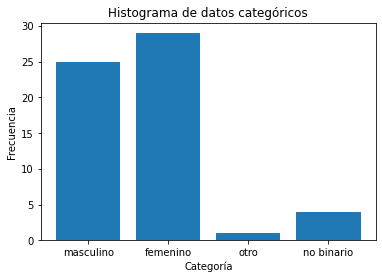

GRAFICOS DE VARIABLE: promedio


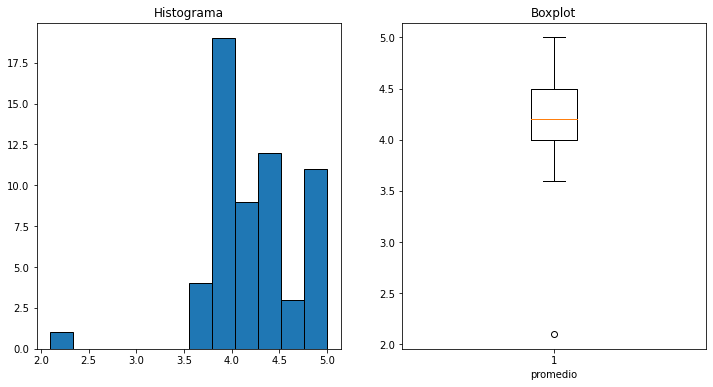

GRAFICOS DE VARIABLE: region


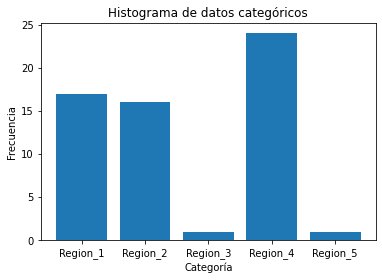

ANALISIS ASIGNACION DE BECAS - PROPUESTA 2

Iteracion numero 1 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos con indice: 
[376, 162]
Para el estrato 2 se asignaron becas a los candidatos con indice: 
[243, 7, 207]
Para el estrato 3 se asignaron becas a los candidatos con indice: 
[60, 471, 109]
Para el estrato 4 se asignaron becas a los candidatos con indice: 
[394]
Para el estrato 5 se asignaron becas a los candidatos con indice: 
[259]

Iteracion numero 2 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos con indice: 
[363, 283]
Para el estrato 2 se asignaron becas a los candidatos con indice: 
[491, 137, 478]
Para el estrato 3 se asignaron becas a los candidatos con indice: 
[159, 9, 49]
Para el estrato 4 se asignaron becas a los candidatos con indice: 
[53]
Para el estrato 5 se asignaron becas a los candidatos con indice: 
[99]

Iteracion numero 3 de asignacion de becas
Para el estrato 1 se asignaron becas a los candidatos co

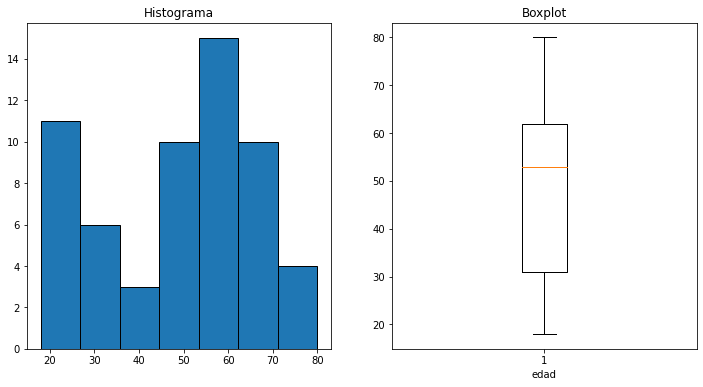

GRAFICOS DE VARIABLE: escolaridad


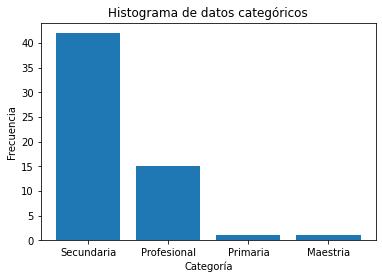

GRAFICOS DE VARIABLE: estado_civil


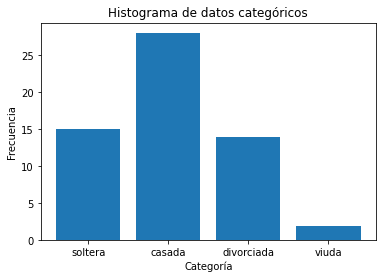

GRAFICOS DE VARIABLE: estrato


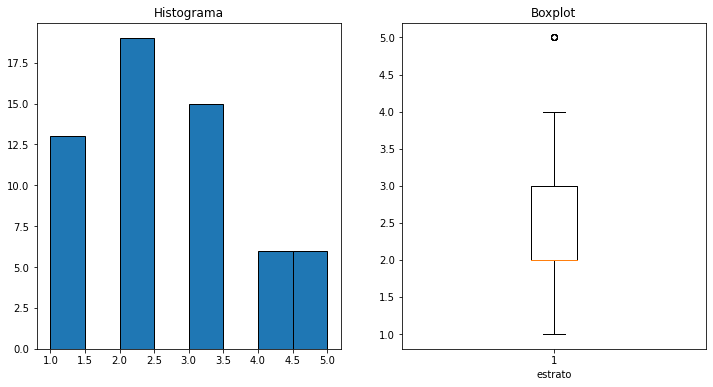

GRAFICOS DE VARIABLE: genero


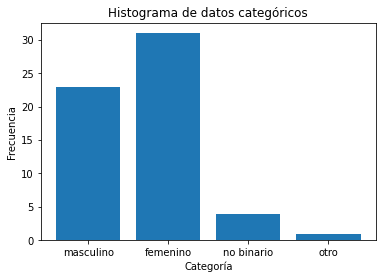

GRAFICOS DE VARIABLE: promedio


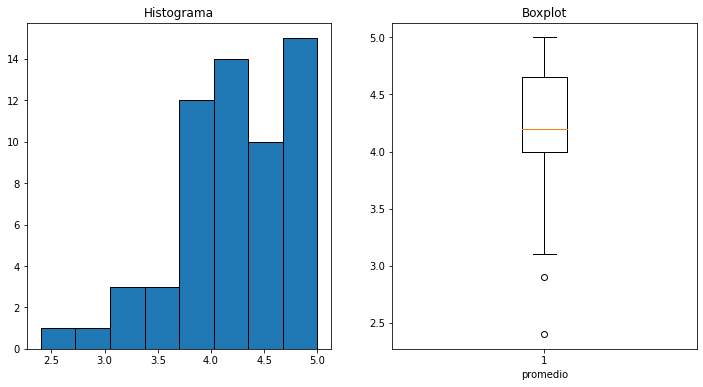

GRAFICOS DE VARIABLE: region


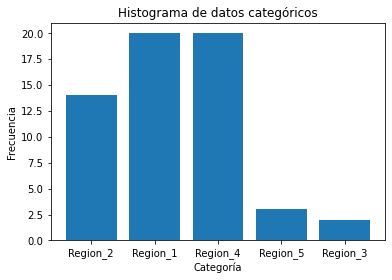

In [87]:
# Crea los diccionarios de los becadas partiendo de los indices
def crear_diccionarios_becados(dicc_variables, becados):
    dicc_becados = {}
    lista_edad = []
    lista_escolaridad = []
    lista_estado_civil = []
    lista_estrato = []
    lista_genero = []
    lista_promedio = []
    lista_region = []
    lista_indice = []
    
    for i in becados:
        lista_edad.append(dicc_variables["edad"][i])
        lista_escolaridad.append(dicc_variables["escolaridad"][i])
        lista_estado_civil.append(dicc_variables["estado_civil"][i])
        lista_estrato.append(dicc_variables["estrato"][i])
        lista_genero.append(dicc_variables["genero"][i])
        lista_promedio.append(dicc_variables["promedio"][i])
        lista_region.append(dicc_variables["region"][i])
        lista_indice.append(dicc_variables["indice"][i])
    dicc_becados["edad"] = lista_edad
    dicc_becados["escolaridad"] = lista_escolaridad
    dicc_becados["estado_civil"] = lista_estado_civil
    dicc_becados["estrato"] = lista_estrato
    dicc_becados["genero"] = lista_genero
    dicc_becados["promedio"] = lista_promedio
    dicc_becados["region"] = lista_region
    dicc_becados["indice"] = lista_indice      

    return dicc_becados   


m=input("Ingrese el numero de becas a asignar para ambas propuestas: ")
print("")

#Ejecucion de funciones que calculan becas para ambas propuestas
print("\033[1m\033[91mANALISIS ASIGNACION DE BECAS - PROPUESTA 1\033[0m")
becas_asignadas_1 = asignacion_becas_prpuesta_1(dicc_variables, int(m))
print("")
print("ANALISIS ESTADISTICO DE BECAS PROPUESTA 1\n")
dic=crear_diccionarios_becados(dicc_variables, becas_asignadas_1)
analisis_estadistico_f(dic)

print("\033[1m\033[91mANALISIS ASIGNACION DE BECAS - PROPUESTA 2\033[0m")
becas_asignadas_2 = asignar_becas_propuesta_2(dicc_variables, int(m))
print("")
print("ANALISIS ESTADISTICO DE BECAS PROPUESTA 2\n")
dic=crear_diccionarios_becados(dicc_variables, becas_asignadas_2)
analisis_estadistico_f(dic)


print("")



## Fase 3: desarrollar una solución analítica

# Reconociendo la complejidad de este problema y viendo el potencial del análisis de datos para enriquecer la discusión, el comité requiere una herramienta analítica que permita definir y evaluar nuevas propuestas de asignación de becas. Se debe poder:

1. Ingresar el número de becas disponibles (ej., `N=0`).


2. Ingresar un rango de edad para los candidatos factibles (ej., `min_edad=99, max_edad=100`).


3. Elegir cualesquiera de las siguientes tres características: género, estrato, región (ej., `caracteristicas=["genero", "estrato"]`).

    
4. Ingresar interactivamente (durante la ejecución de la herramienta) el porcentaje del total de las becas que se asignará a las personas con mejor promedio académico dentro de cada una de las combinaciones de las características elegidas. Por ejemplo, si se eligen las características `"genero"` y `"estrato"`, deberá asignarse un porcentaje a cada combinación (ej., asignar 3\% de las becas al género `"masculino"` del estrato `1`, asignar 5\% de las becas al género `"femenino"` del estrato `1`, etc.).

La herramienta debe permitir al comité configurar una nueva propuesta y seleccionar al grupo de potenciales beneficiarios de las becas de acuerdo con la propuesta configurada. Además, la herramienta debe exponer métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas.

### Misión 7

Desarrolla un algoritmo que reciba los parámetros para configurar la nueva propuesta y seleccione a los potenciales beneficiarios de las becas.

In [74]:
# Funcion para mostrar las caracteristicas del modelo
def print_modelo(num_becas_t, edad_min, edad_max, caracteristicas, becas_asignadas):
    print("\n\n")
    print("\033[1m\033[91mModelo con parametros\033[0m")
    print("\033[1mnum_becas: \033[0m" + str(num_becas_t))
    print("\033[1medad_min: \033[0m" + str(edad_min))
    print("\033[1medad_max: \033[0m" + str(edad_max))
    print("\033[1mCaracteristicas: \033[0m" + str(caracteristicas))
    print("\n")
    print("\nBecas asignadas: " + str(len(becas_asignadas)))

# Funcion para crear lista de valores unicos
def valores_unicos(datos, llave): 
    lista = []
    for valores in datos[llave]:
        if not valores in lista:
            lista.append(valores)
    return  lista

## Funcion para crear las posibles combinacione de las caracteristicas seleccionadas
def segmentacion_var_f_2(dicc_variables, caracteristicas):
    dicc_variables3 = {k: v[:] for k, v in dicc_variables.items()}
    dicc_variables3["validacion"] = ""
    list_caracteristicas = []
    if len(caracteristicas)==1:
        for i in range(0, len(dicc_variables["edad"])):
            list_caracteristicas.append(str(dicc_variables3[caracteristicas[0]][i]))
            
    elif len(caracteristicas)==2:
        l1 = caracteristicas[0]
        l2 = caracteristicas[1]    
        for i in range(0, len(dicc_variables["edad"])):
            list_caracteristicas.append(str(dicc_variables3[l1][i]) + " - " + str(dicc_variables3[l2][i]))
    else:
        l1 = caracteristicas[0]
        l2 = caracteristicas[1]    
        l3 = caracteristicas[2]
        for i in range(0, len(dicc_variables["edad"])):
            list_caracteristicas.append(str(dicc_variables3[l1][i]) + " - " + str(dicc_variables3[l2][i]) + " - " + str(dicc_variables3[l3][i]))
    dicc_variables3["validacion"] = list_caracteristicas #Creo una nueva columna en la copia de mi diccionario, donde tengo referenciada la combinacion que se da para la fila de los valores de region y genero 
    lista_grupos_segm = valores_unicos(dicc_variables3, "validacion")
    return lista_grupos_segm, dicc_variables3

#Funcion para asignacion de becas
def nuevo_algoritmo():
    # Solicitar entrada de usuario
    num_becas_t = int(input("\033[1mIngrese el número de becas disponibles: \033[0m"))
    num_becas = num_becas_t
    edad_min = int(input("\033[1mIngrese la edad mínima: \033[0m"))
    edad_max = int(input("\033[1mIngrese la edad máxima: \033[0m"))
    print("")
    print("Características disponibles: genero, estrato, region")
    caracteristicas = input("\033[1mIngrese las características a considerar separadas por coma y espacio\033[0m (ej. genero, estrato, region):").split(", ")
    print("")
    variables_dicc3 = segmentacion_var_f_2(dicc_variables, caracteristicas)
    variables = variables_dicc3[0]
    dicc_variables3 = variables_dicc3[1]
    lis_porcentaje_becas = []
    print("Ahora asigne los porcentajes correspondientes a cada posible combinacion de las caracteristicas seleccionadas: " + str(caracteristicas))
    porcentaje_becas = {}
    contador = len(variables)
    for opcion in variables:
        
        print("\033[1mQuedan " + str(contador) +  " valores por ingresarn\033[0m")
        contador -= 1
        #valor = float(input(f"Ingrese el porcentaje de becas para la opcion  '{opcion}': (Use el . para decimales, no use el simbolo %. Ejm: 22.3 equivale a 22.3%)"))
        valor = float(input(f"Ingrese el porcentaje de becas para la opción '\033[1m{opcion}\033[0m': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)"))
        porcentaje_becas[opcion] = valor

    #Asignacion de becas
    lis_porcentaje_becas = list(porcentaje_becas.values())
    lis_porcentaje_becas = [x/100 for x in lis_porcentaje_becas]
    becas_asignadas = []
    estudiantes_con_beca = set()
    contador = 0
    for variable in variables:
                
                subpoblacion = [i for i, (e, edad) in enumerate(zip(dicc_variables3['validacion'], dicc_variables3['edad'])) if e == variable and i not in estudiantes_con_beca and edad_min <= edad <= edad_max]
                subpoblacion.sort(key=lambda i: dicc_variables3['promedio'][i], reverse=True)
                num_becas_combinacion = max(1, int(num_becas_t*lis_porcentaje_becas[contador])) # si llega a ser 0.xx, asignara una beca. Se aprox por abajo para decimales
                contador +=1
                
                if len(subpoblacion) == 0:
                    print("\nNingun estudiante de la categoria " + variable + " cumple los criterios de edad_minima = " +  str(edad_min) + " y edad_maxima= " + str(edad_max))
                else:
                    if len(subpoblacion) - num_becas_combinacion < 0:
                        print("\033[1m\nPara el grupo de caracteristicas '" + variable + "' hay mas becas disponibles que posibles usuarios a asignar: becas: " + str(num_becas_combinacion) +  " vs candidatos: " + str(len(subpoblacion))+"\033[1m")
                        num_becas_combinacion = abs(len(subpoblacion))
                        
                    for i in range(num_becas_combinacion):
                        becas_asignadas.append(subpoblacion[i])
                        estudiantes_con_beca.add(subpoblacion[i])  # Agregar el índice del estudiante con beca
                        num_becas -= 1
                        if num_becas == 0:
                            print_modelo(num_becas_t, edad_min, edad_max, caracteristicas, becas_asignadas)
                            return becas_asignadas
    
    print_modelo(num_becas_t, edad_min, edad_max, caracteristicas, becas_asignadas)
    return becas_asignadas    
print("")
becas_asignadas = nuevo_algoritmo()
if len(becas_asignadas) == 0:
    print("\nNo se asigno ninguna beca debido a la restriccion de edad")
else:
    print("\033[1mLos indices de los estudiantes a los que se les asignaron becas son: \033[0m" + str(becas_asignadas) + "\n")




Ingrese el número de becas disponibles: 4
Ingrese la edad mínima: 1
Ingrese la edad máxima: 99

Características disponibles: genero, estrato, region
Ingrese las características a considerar separadas por coma y espacio (ej. genero, estrato, region):region, genero

Ahora asigne los porcentajes correspondientes a cada posible combinacion de las caracteristicas seleccionadas: ['region', 'genero']
Quedan 18 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'Region_1 - masculino': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)10
Quedan 17 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'Region_2 - femenino': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)10
Quedan 16 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'Region_2 - masculino': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)10
Quedan 15 valores por ingresarn
Ingrese el porcentaje de becas par

# Misión 8

Con base en tu desarrollo de la misión 7, implementa un algoritmo que: le permita al comité configurar una nueva propuesta; exponga métricas y visualizaciones de las principales características demográficas del grupo de potenciales beneficiarios para la propuesta configurada.


Ingrese el número de becas disponibles: 100
Ingrese la edad mínima: 10
Ingrese la edad máxima: 99

Características disponibles: genero, estrato, region
Ingrese las características a considerar separadas por coma y espacio (ej. genero, estrato, region):genero, estrato, region

Ahora asigne los porcentajes correspondientes a cada posible combinacion de las caracteristicas seleccionadas: ['genero', 'estrato', 'region']
Quedan 59 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'masculino - 5 - Region_1': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)1.7
Quedan 58 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'masculino - 1 - Region_1': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)1.7
Quedan 57 valores por ingresarn
Ingrese el porcentaje de becas para la opción 'femenino - 3 - Region_2': (Use el . para decimales, no use el símbolo %. Ejm: 22.3 equivale a 22.3%)1.7
Quedan 56 valores por ingres

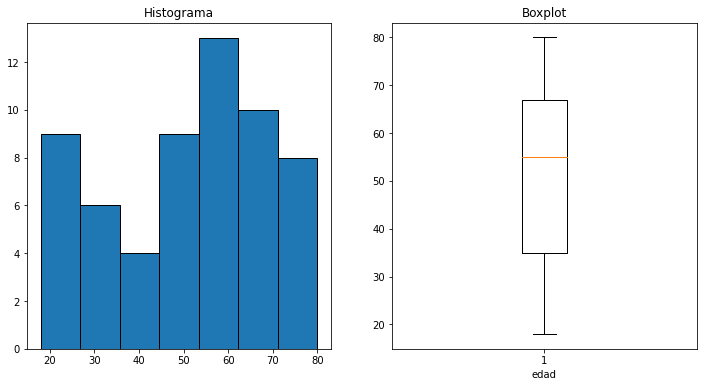

GRAFICOS DE VARIABLE: escolaridad


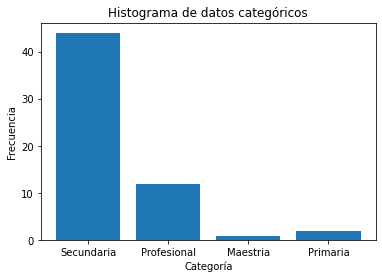

GRAFICOS DE VARIABLE: estado_civil


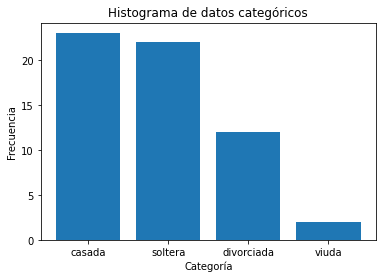

GRAFICOS DE VARIABLE: estrato


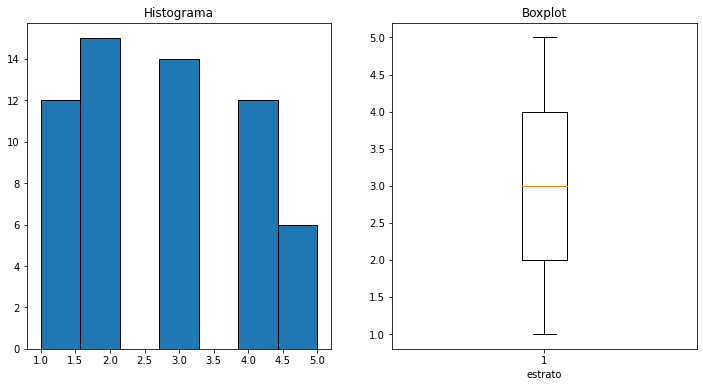

GRAFICOS DE VARIABLE: genero


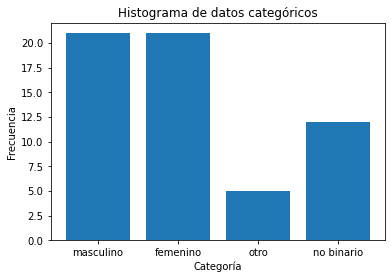

GRAFICOS DE VARIABLE: promedio


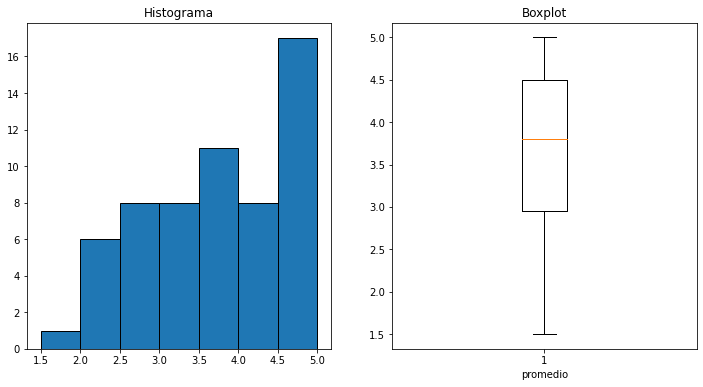

GRAFICOS DE VARIABLE: region


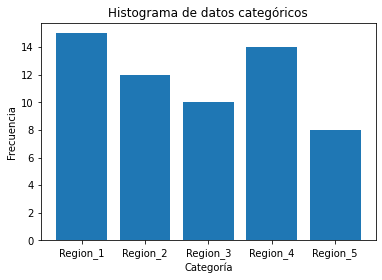

In [81]:
print("")
becas_asignadas = nuevo_algoritmo()
if len(becas_asignadas) == 0:
    print("\nNo se asigno ninguna beca debido a la restriccion de edad")
else:
    print("\033[1mLos indices de los estudiantes a los que se les asignaron becas son: \033[0m" + str(becas_asignadas) + "\n")
    dic=crear_diccionarios_becados(dicc_variables, becas_asignadas)

    print("\n\n")
    print("\033[1m\033[91mANALISIS DEL MODELO:\033[0m")
    analisis_estadistico_f(dic)

# Misión 9

Utiliza tu herramienta para configurar propuestas a tu criterio. Con sustento en las métricas y visualizaciones que obtengas, elige una de las propuestas que configuraste. Compara y concluye acerca de las virtudes y falencias de tu propuesta con respecto a las de las dos propuestas del comité.





Modelo con parametros
num_becas: 59
edad_min: 10
edad_max: 99
Caracteristicas: ['genero', 'estrato', 'region']



Becas asignadas: 59
La media de la variable  edad es : 51.54237288135593
La mediana de la variable  edad es : 55
La varianza de la variable  edad es : 345.7058316575696
La desviación estandar de la variable  edad es : 18.59316626230104
El valor maximo de la variable  edad es : 80
El valor minimo de la variable  edad es : 18

La media de la variable  estrato es : 2.7457627118644066
La mediana de la variable  estrato es : 3
La varianza de la variable  estrato es : 1.6133295030163752
La desviación estandar de la variable  estrato es : 1.2701690844200135
El valor maximo de la variable  estrato es : 5
El valor minimo de la variable  estrato es : 1

La media de la variable  promedio es : 3.691525423728813
La mediana de la variable  promedio es : 3.8
La varianza de la variable  promedio es : 0.834673944268888
La desviación estandar de la variable  promedio es : 0.9136049169465

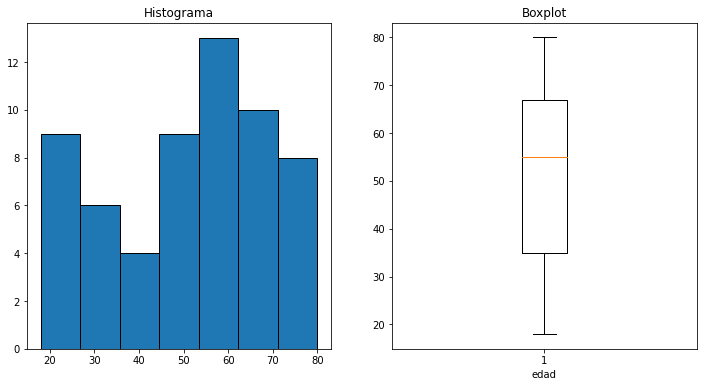

GRAFICOS DE VARIABLE: escolaridad


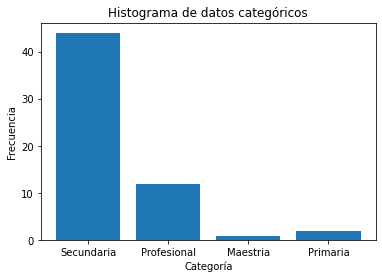

GRAFICOS DE VARIABLE: estado_civil


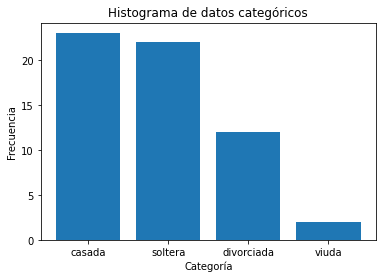

GRAFICOS DE VARIABLE: estrato


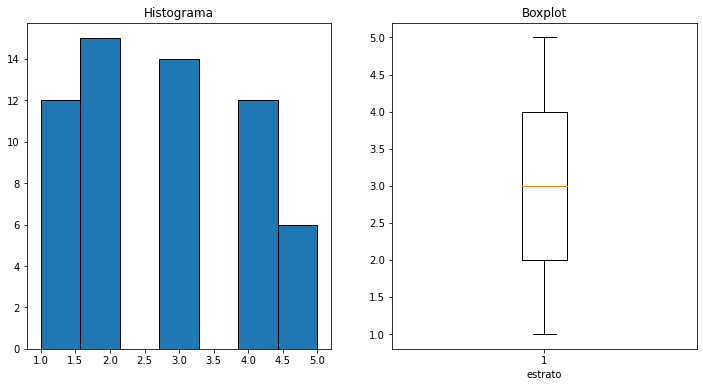

GRAFICOS DE VARIABLE: genero


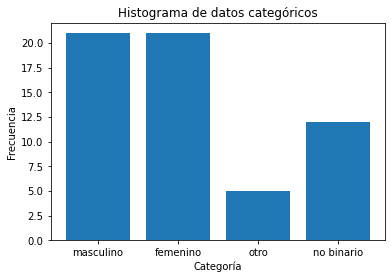

GRAFICOS DE VARIABLE: promedio


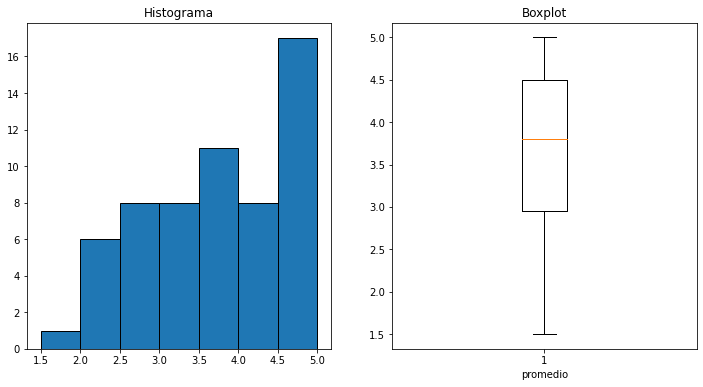

GRAFICOS DE VARIABLE: region


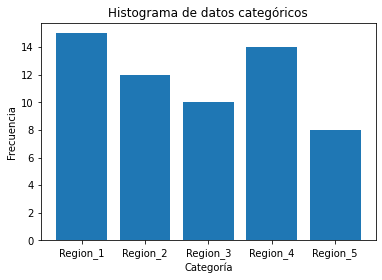

In [84]:
# 59 becas a asignar, asignando 1.7% de becas a cada combinacion de genero, estrato, region (59 combinaciones en total)
def nuevo_algoritmo():
    
    num_becas_t = 59
    num_becas = num_becas_t
    edad_min = 10
    edad_max = 99
    caracteristicas = ["genero", "estrato", "region"]
    variables_dicc3 = segmentacion_var_f_2(dicc_variables, caracteristicas)
    variables = variables_dicc3[0]
    dicc_variables3 = variables_dicc3[1]
    lis_porcentaje_becas = []
    porcentaje_becas = {"masculino - 5 - Region_1":1.7, "masculino - 1 - Region_1":1.7, "femenino - 3 - Region_2":1.7, "masculino - 3 - Region_2":1.7, "otro - 2 - Region_3":1.7, "no binario - 3 - Region_4":1.7, "masculino - 4 - Region_5":1.7, "femenino - 2 - Region_1":1.7, "femenino - 2 - Region_4":1.7, "masculino - 3 - Region_1":1.7, "femenino - 2 - Region_2":1.7, "no binario - 1 - Region_2":1.7, "femenino - 1 - Region_2":1.7, "masculino - 3 - Region_4":1.7, "masculino - 2 - Region_1":1.7, "no binario - 2 - Region_4":1.7, "masculino - 2 - Region_4":1.7, "femenino - 3 - Region_1":1.7, "masculino - 1 - Region_4":1.7, "femenino - 3 - Region_4":1.7, "femenino - 1 - Region_1":1.7, "femenino - 1 - Region_4":1.7, "no binario - 2 - Region_1":1.7, "masculino - 2 - Region_2":1.7, "femenino - 5 - Region_4":1.7, "masculino - 1 - Region_3":1.7, "femenino - 2 - Region_3":1.7, "masculino - 3 - Region_5":1.7, "femenino - 3 - Region_3":1.7, "femenino - 4 - Region_4":1.7, "no binario - 2 - Region_2":1.7, "no binario - 1 - Region_4":1.7, "masculino - 1 - Region_5":1.7, "masculino - 4 - Region_4":1.7, "femenino - 4 - Region_5":1.7, "masculino - 2 - Region_3":1.7, "femenino - 5 - Region_3":1.7, "masculino - 1 - Region_2":1.7, "masculino - 3 - Region_3":1.7, "masculino - 4 - Region_3":1.7, "otro - 2 - Region_4":1.7, "femenino - 4 - Region_3":1.7, "no binario - 3 - Region_2":1.7, "otro - 4 - Region_5":1.7, "masculino - 5 - Region_4":1.7, "femenino - 4 - Region_1":1.7, "no binario - 3 - Region_1":1.7, "no binario - 3 - Region_5":1.7, "masculino - 4 - Region_2":1.7, "no binario - 5 - Region_1":1.7, "femenino - 2 - Region_5":1.7, "no binario - 1 - Region_1":1.7, "no binario - 4 - Region_1":1.7, "femenino - 1 - Region_3":1.7, "femenino - 4 - Region_2":1.7, "femenino - 5 - Region_2":1.7, "otro - 3 - Region_1":1.7, "masculino - 4 - Region_1":1.7, "otro - 2 - Region_5":1.7}
    
    #Asignacion de becas
    lis_porcentaje_becas = list(porcentaje_becas.values())
    lis_porcentaje_becas = [x/100 for x in lis_porcentaje_becas]
    becas_asignadas = []
    estudiantes_con_beca = set()
    contador = 0
    for variable in variables:
                
                subpoblacion = [i for i, (e, edad) in enumerate(zip(dicc_variables3['validacion'], dicc_variables3['edad'])) if e == variable and i not in estudiantes_con_beca and edad_min <= edad <= edad_max]
                subpoblacion.sort(key=lambda i: dicc_variables3['promedio'][i], reverse=True)
                num_becas_combinacion = max(1, int(num_becas_t*lis_porcentaje_becas[contador])) # si llega a ser 0.xx, asignara una beca. Se aprox por abajo para decimales
                contador +=1
                
                if len(subpoblacion) == 0:
                    print("\nNingun estudiante de la categoria " + variable + " cumple los criterios de edad_minima = " +  str(edad_min) + " y edad_maxima= " + str(edad_max))
                else:
                    if len(subpoblacion) - num_becas_combinacion < 0:
                        print("\033[1m\nPara el grupo de caracteristicas '" + variable + "' hay mas becas disponibles que posibles usuarios a asignar: becas: " + str(num_becas_combinacion) +  " vs candidatos: " + str(len(subpoblacion))+"\033[1m")
                        num_becas_combinacion = abs(len(subpoblacion))
                        
                    for i in range(num_becas_combinacion):
                        becas_asignadas.append(subpoblacion[i])
                        estudiantes_con_beca.add(subpoblacion[i])  # Agregar el índice del estudiante con beca
                        num_becas -= 1
                        if num_becas == 0:
                            print_modelo(num_becas_t, edad_min, edad_max, caracteristicas, becas_asignadas)
                            return becas_asignadas
    
    print_modelo(num_becas_t, edad_min, edad_max, caracteristicas, becas_asignadas)
    return becas_asignadas    
print("")
becas_asignadas = nuevo_algoritmo()
dic=crear_diccionarios_becados(dicc_variables, becas_asignadas)
analisis_estadistico_f(dic)

La propuesta 1 tiende a favorecer la región 1 y región 4, debido a que hay mayor cantidad de encuestados en esta región, por lo que no considera una distribución equitativa para el resto de población considerando los otros criterios.

La propuesta dos, al considerar únicamente el estrato, puede llegar a incluir completamente a los estratos con menor representación, estrato 4 y 5. Aunque esta propuesta es equitativa, desde el punto de vista que asigna porcentualmente la misma cantidad de becas para cada estrato, desconoce los otros criterios que representa a la población, edad, escolaridad, estado civil, genero, promedio y región.  Por lo tanto , por ejemplo, los estratos 1, 2, y 3 recibirán el mayo numero de becas ya que representan la mayoría de los encuestados.

PROPUESTA USANDO EL MODELO DEL PUNTO 8:
Realizo el supuesto que se tienen 59 becas para asignar.
Para la edad, el total de encuestados esta representado relativamente igual, aunque la mayoría esta en los rangos de edad de19 a 25 años. Por esta razon no buscare filtrar edades. Por lo tanto considero tomar los tres criterios, género, estrato, región, que generan un total de 59 combinaciones, es decir que toda la población de encuestados, 500, se agrupa en 59 subgrupos. Esta desicion la tomo considerando buscar una mejor distribucion considerando estos tres factores para evitar en lo posible asignar becas concentrandome en un solo criterio.

Ahora lo importante es entender como los 59 grupos estan representados en proporción en relacion al total de datos, para distribuir equitativamente las becas.  Como se puede ver en las gráficas de esta propuesta , se tiene una representación  equitativa de región, genero (considerando las proporciones de distribucion de genero en la muestra de 500 encuestados), y estrato. 
En esta propuesta no hago filtro por edad, ya que como se ve en el histograma de edad, en el punto dos, la representaciond de las edades en las 500 personas es relativamente similar para todos los rangos.
Sin embargo esta distribución va a depender del total de numero de becas, ya que dependiendo del total de becas existirán  subgrupos que no recibirán becas y quedaran excluidos. 

En conclusión el sistema debe considerar que criterios mas importante para la asignación de becas con el fin de lograr la mejor forma de asignación en relacion a la cantidad de encuestados. Por ejemplo si se busca que prime el estrato, dando mas importancia a los estratos menores, la segunda propuesta de la universidad (filtrar por estrato) hace mas sentido. Por otro lado si se busca una representación equitativa de diferentes variables (eje, región, genero y estrato) la tercera propuesta hacia mas sentido pues permite representar los tres criterios de forma mas equitativa.

## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.
 
__Fecha última actualización__: 11/07/2022